# Monitorización

En este ejemplo crearemos un circuito y lo lanzaremos a ejecutar sobre un computador real, monitorizando el estado del trabajo con la función job_monitor. 

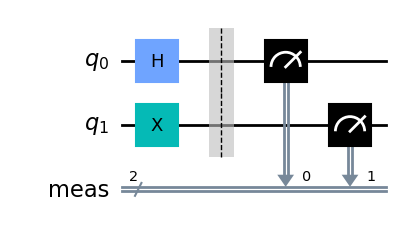

In [1]:
from qiskit import QuantumCircuit, execute

#creamos el circuit
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)

#insertamos la medida
qc.measure_all()

qc.draw()

¿Cuál sería el estado cuántico antes de la medida? ¿Qué salidas esperaríamos encontrar?

In [2]:
#elegimos donde ejecutarlo
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider import least_busy

provider=IBMProvider()
devices = provider.backends(simulator=False, operational=True)
backend = least_busy(devices)

In [3]:
#lanzo la ejecucion, monitorizo y obtengo resultados
from qiskit.tools import job_monitor

job=execute(qc,backend,shots=1000)
job_monitor(job)

Job Status: job has successfully run


In [4]:
#obtengo e imprimo los resultados
result=job.result()
counts=result.get_counts(qc)
print(counts)

{'00': 33, '01': 124, '10': 326, '11': 517}


In [5]:
import qiskit.tools.jupyter
%qiskit_version_table